# 03 &mdash; Parametric Inference, part 1 &mdash; practice


1. From the CDC' BRFSS dataset (`cdc.csv`), plot the histogram of the empirical sampling distribution of the sample _maximum_ for variable age, using 2000 random subsamples of the dataset, each of size 50

[88. 80. 86. ... 83. 83. 79.]


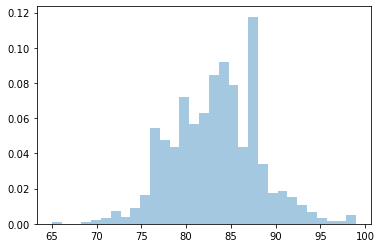

In [24]:
# code for exercise 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# fix random seed so that results are reproducible (do not change)
np.random.seed(42)

df = pd.read_csv("cdc.csv")
# let's now draw 1000 uniform samples, each of size 50
sample_num = 2000
sample_size = 50

# initialize a numpy array of size (sample_num, sample_size) to store the samples
cdc_samples = np.empty([sample_num, sample_size])

# draw the samples by calling the rvs function
for i in range(sample_num):
    cdc_samples[i:] = df.age.sample(sample_size)

# now compute the sample means for our samples
max_samples = np.max(cdc_samples, axis=1) # row-wise
print(max_samples)

sns.distplot(max_samples, kde=False, norm_hist=True)
plt.show()

2. From the CDC' BRFSS dataset (`cdc.csv`), compute a 99%-confidence interval for the mean height of a sample of size 50, using the z distribution. Then, establish, with a one-sided z-test at level 0.5%, whether or not the mean height is significantly greater than 68. 
    * Given that you computed the CI, could you have derived the result of the test from the CI without performing the test explicitly? motivate why

In [33]:
# code for exercise 2
# fix random seed so that results are reproducible (do not change)
import statsmodels.api as sm

np.random.seed(42)

n = 50 #sample of size 50
alpha = 0.01
# draw a random sample of size 50
cdc_height_samples = df.height.sample(n)
print('CI: '+str(sm.stats.zconfint(cdc_height_samples, alpha=alpha)))

t_value, p_value = sm.stats.ztest(cdc_height_samples, value=68,alternative='larger')
print('p value: '+str(p_value))

CI: (66.51041892460313, 69.40958107539686)
p value: 0.5283321197337933


The ones-ded z-test is at level 0.5% and p-value is far away from it so the NULL hypothesis can not be rejected.

3. Draw a random sample of 100 observation from the London murder dataset. Establish, with an exact binomial test at level 0.01, whether the observed proportion of homicides happening in `'Lambeth'` is significantly above 5%. Print the p-value and the result of the test.

In [15]:
# code for exercise 3
# fix random seed so that results are reproducible (do not change)
np.random.seed(42)
n = 100
# read the london_murders.csv file
df_murders = pd.read_csv("london_murders.csv")

# draw a random sample of size 100
df_murders_sample = df_murders.sample(100)
prop_lambeth = np.mean(df_murders_sample.borough == 'Lambeth')
print('Proportion of homicides happening in Lambeth is '+str(prop_lambeth))

# binom_test of scipy.stats takes in input the test statistic (number of successes), number of trials, and p_0
# alternative param is one of two-sided’, ‘greater’, ‘less’
p_val_bin = stats.binom_test(x=n*prop_lambeth, n=n, p=0.05, alternative='greater')

print('p value of binomial test is: '+str(p_val_bin))

Proportion of homicides happening in Lambeth is 0.11
p value of binomial test is: 0.011472410067484664


The p-value 0.011472410067484664 is greater than 0.01 so you can not reject the NULL hypothesis.